In [43]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Кіберзахист об'єктів критичної інфраструктури
Лабораторна №1
ФБ-31мн
Скоробагатько Максим
Варіант №5

Вносимо дані відповідно до варіанту

In [44]:
x = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
y = [5, 6, 7, 1, 2, 3, 5, 4, 3, 2, 1, 0.01]


Будуємо графік залежності $y$ від $x$ 

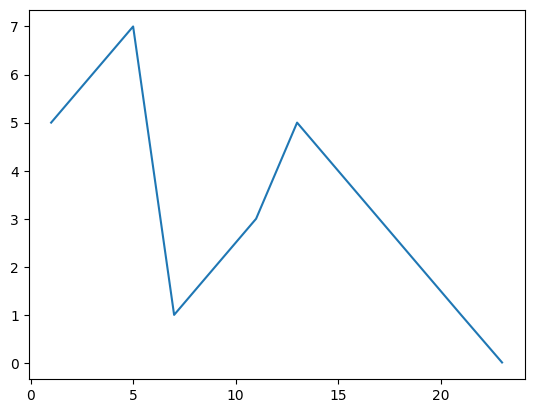

In [45]:
xpoints = np.array(x)
ypoints = np.array(y)

plt.plot(xpoints, ypoints)
plt.show()

Обчислюємо параметри лінійної регресії $a_{\text{МНК}} = \frac{cov_{x,y}}{\sigma^{2}}$, $b = y' - a_{\text{МНК}}$,

де $x' = \frac{\sum_{i=1}^{T}x_{i}}{T}$ 

$y' = \frac{\sum_{i=1}^{T}y_{i}}{T}$, 

$\sigma^{2} = \frac{\sum_{i=1}^{T}(x_{i} - x')^{2}}{T - 1}$, 

$cov_{x,y} = \frac{\sum_{i=1}^{T}(x_{i} - x')(y_{i} - y')}{T - 1}$

In [46]:
x_average = sum(x) / len(x)
y_average = sum(y) / len(y)

print('x середнє -- ', x_average, '\ny середнє -- ', y_average)

temp_sum = []
for i in x:
    temp_sum.append( pow(i - x_average, 2) )

dispersion = sum(temp_sum) / (len(x) - 1)
del temp_sum

print('дисперсія -- ', dispersion)

temp_sum = []
for i in range(0, len(x)):
    temp_sum.append( (x[i] - x_average) * (y[i] - y_average) )

covariation = sum(temp_sum) / (len(x) - 1)
del temp_sum

print('коваріація -- ', covariation, '\n')

############################
a = covariation / dispersion

b = y_average - a

print('a_mnk -- ', a, '\nb -- ', b)

x середнє --  12.0 
y середнє --  3.250833333333333
дисперсія --  52.0
коваріація --  -10.626363636363635 

a_mnk --  -0.20435314685314682 
b --  3.45518648018648


Тепер необхідно перевірити адекватність використаної моделі. Для цього необхдно обчислити коефіцієнт детермінації $R^{2}$ та похибку $\varepsilon$

$R^{2} = \frac{\sum_{i=1}^{T} (y_{i}^{*} - y')^{2}}{\sum_{i=1}^{T} (y_{i} - y')^{2}}$

$\varepsilon = \frac{1}{T} * \sum_{i=1}^{T} |\frac{y_{i} - y_{i}^{*}}{y_{i}}| * 100$

In [47]:
y_linear = []
for i in x:
    y_linear.append( a * i + b )

temp_sum1 = []
temp_sum2 = []
for i in range(0, len(y)):
    temp_sum1.append( pow(y_linear[i] - y_average, 2) )
    temp_sum2.append( pow(y[i] - y_average, 2) )

r_2 = sum(temp_sum1) / sum(temp_sum2)
del temp_sum1, temp_sum2

print('коефіцієнт r^2 -- ', r_2)



temp_sum = []
for i in range(0, len(y)):
    temp_sum.append( abs( ( y[i] - y_linear[i] ) / y[i] ) )

epsilon = sum(temp_sum) / len(y) * 100
del temp_sum

print('похибка e -- ', epsilon)

коефіцієнт r^2 --  1.6196706677176806
похибка e --  1121.9621023652267


За отриманими даними маємо наступні результати:

відсутня лінійна регресія між $x$ та $y$, оскільки значення коефіцієнта детермінації суттєво різниться від одиниці.

маємо суттєве значення похибки. на що впливає показник 23го місяця після прийняття політики.
